In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel(r'C:\Users\USER\Documents\customer_booking.xlsx')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

<Axes: xlabel='booking_complete', ylabel='count'>

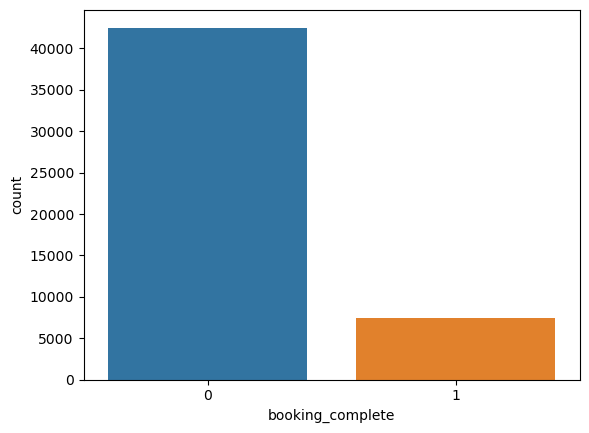

In [9]:
sns.countplot(df,x='booking_complete')

In [4]:
df = df.drop(['route','booking_origin'],axis=1)
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,1,0,1,5.52,0


In [5]:
dum = pd.get_dummies(df[['sales_channel','trip_type','flight_day']],drop_first=True)

df = pd.concat([df.drop(['sales_channel','trip_type','flight_day'],axis=1),dum],axis=1)

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()

In [10]:
scaler.fit(df.drop('booking_complete',axis=1))

MinMaxScaler()

In [11]:
scaled = scaler.transform(df.drop('booking_complete',axis=1))

In [12]:
df_1 = pd.DataFrame(scaled,columns=df.columns[:-1])
df_1.head()
df_1.to_csv("pred.csv")

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df_1
y = df['booking_complete']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
Rand = RandomForestClassifier(n_estimators=5)

In [18]:
Rand_mod = Rand.fit(X_train,y_train)

In [19]:
pred = Rand_mod.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

[[13347   747]
 [ 2126   280]]

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     14094
           1       0.27      0.12      0.16      2406

    accuracy                           0.83     16500
   macro avg       0.57      0.53      0.53     16500
weighted avg       0.78      0.83      0.79     16500



Text(0.5, 0, 'Random Forest Feature Importance')

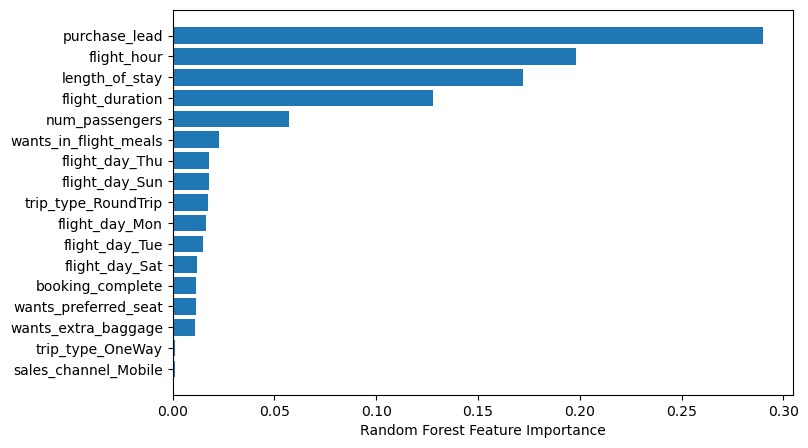

In [22]:
plt.figure(figsize=(8,5))
new_idx = Rand.feature_importances_.argsort()
plt.barh(df_1.columns[new_idx], Rand.feature_importances_[new_idx])
plt.xlabel("Random Forest Feature Importance")